DATA SCIENCE- ASSIGNMENT 2

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Q 1.	Look at the data given below. Plot the data, find the outliers and find out  μ,σ,σ^2

Name of company	    Measure X
Allied Signal	    24.23%
Bankers Trust	    25.53%
General Mills	    25.41%
ITT Industries	    24.14%
J.P.Morgan & Co.	29.62%
Lehman Brothers	    28.25%
Marriott	        25.81%
MCI	                24.39%
Merrill Lynch	    40.26%
Microsoft   	    32.95%
Morgan Stanley	    91.36%
Sun Microsystems	25.99%
Travelers	        39.42%
US Airways	        26.71%
Warner-Lambert	    35.00%

In [20]:
Q1data = {
      'Name of the Company' : ['Allied Signal','Bankers Trust','General Mills', 'ITT Industries','J.P. Morgan & Co.','Lehman Brothers','Mariott','MCI','Merrill Lynch','Microsoft','Morgan Stanley','Sun Microsystem','Travelers','US Airways','Warner-Lambert'],
      'Measure X (%)': ['24.23','25.53','25.41','24.14','29.62','28.25','25.81','24.39','40.26','32.95','91.36','25.99','39.42','26.71','35.00']
}

In [21]:
compdata = pd.DataFrame(Q1data)

In [22]:
print(compdata)

   Name of the Company Measure X (%)
0        Allied Signal         24.23
1        Bankers Trust         25.53
2        General Mills         25.41
3       ITT Industries         24.14
4    J.P. Morgan & Co.         29.62
5      Lehman Brothers         28.25
6              Mariott         25.81
7                  MCI         24.39
8        Merrill Lynch         40.26
9            Microsoft         32.95
10      Morgan Stanley         91.36
11     Sun Microsystem         25.99
12           Travelers         39.42
13          US Airways         26.71
14      Warner-Lambert         35.00


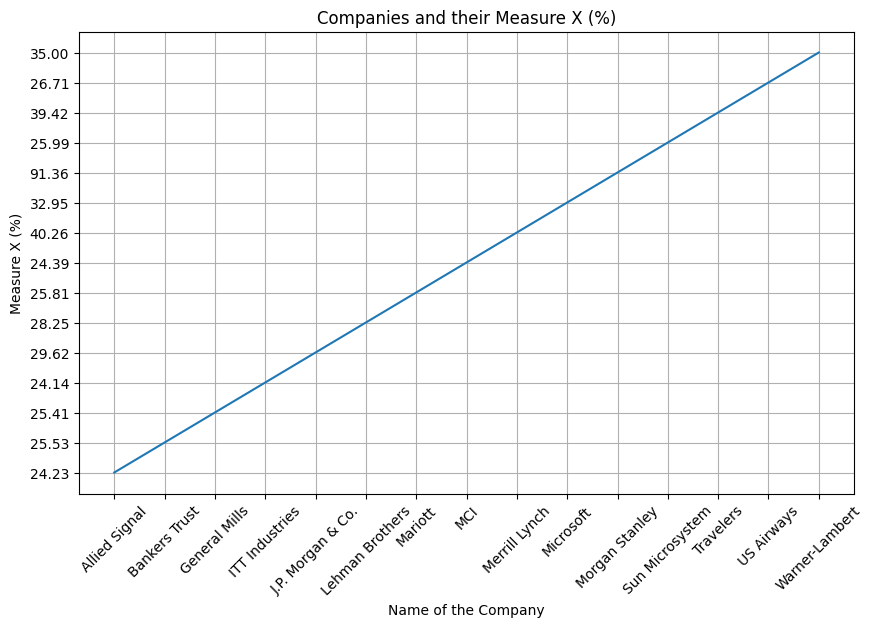

In [25]:
# Plotting of given data
plt.figure(figsize=(10,6))
plt.plot(compdata['Name of the Company'], compdata['Measure X (%)'])
plt.xticks(rotation=45)
plt.xlabel('Name of the Company')
plt.ylabel('Measure X (%)')
plt.title('Companies and their Measure X (%)')
plt.grid(True)
plt.show()

In [30]:
compdata['Measure X (%)'] = compdata['Measure X (%)'].str.replace('%','').astype(float)

In [37]:
mean = np.mean(compdata['Measure X (%)'])
median = np.median(compdata['Measure X (%)'])
std_deviation = np.std(compdata['Measure X (%)'])
variance = np.var(compdata['Measure X (%)'])

In [44]:
print("Mean:                ",  mean)
print("Median:              ",  median)
print("Standard Deviation:  ",  std_deviation)
print("Variance:            ",  variance)

Mean:                 33.27133333333333
Median:               26.71
Standard Deviation:   16.370812590976932
Variance:             268.00350488888887


In [45]:
# Checking outliers
Q1 = compdata['Measure X (%)'].quantile(0.25)
Q3 = compdata['Measure X (%)'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

8.505000000000003


In [50]:
# BY APPLYING FORMULA FOR OUTLIERS
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_compdata = compdata[(compdata['Measure X (%)'] < lower_bound) | (compdata['Measure X (%)'] > upper_bound)]

print("Outliers in Companies:", outliers_compdata)

Outliers in Companies:    Name of the Company  Measure X (%)
10      Morgan Stanley          91.36


# Set 2- Normal Distribution Functions of random variables

1.	The time required for servicing transmissions is normally distributed with  = 45 minutes and  = 8 minutes. The service manager plans to have work begin on the transmission of a customer’s car 10 minutes after the car is dropped off and the customer is told that the car will be ready within 1 hour from drop-off. What is the probability that the service manager cannot meet his commitment? 

A.	0.3875   
B.	0.2676   
C.	0.5   
D.	0.6987 



In [19]:
from scipy.stats import norm
mean_sertime = 45
sd_ser = 8

# it had been assumed that 1000 random samples is being tested, hence size=1000
ser_time = np.random.normal(loc=mean_sertime, scale=sd_ser, size = 1000)
prob_sertime50 =  (ser_time > 50).mean()

print(f"Probability of exceeding commitment time:", (prob_sertime50))




Probability of exceeding commitment time: 0.271


Hence the answer for the above is B, 0.2676


5.	Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N(5, 3^2) and Profit2 ~ N(7, 4^2) respectively. Both the profits are in $ Million. Answer the following questions about the total profit of the company in Rupees. Assume that $1 = Rs. 45
A.	Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
B.	Specify the 5th percentile of profit (in Rupees) for the company
C.	Which of the two divisions has a larger probability of making a loss in a given year?




A.	Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.

In [25]:
mean_profit1 = 5
std_dev_p1 = 3
mean_profit2 = 7
std_dev_p2 = 4
conversion_rate_rupee = 45

total_mean = mean_profit1 + mean_profit2
total_std_dev = np.sqrt(std_dev_p1**2 + std_dev_p2**2)

print(total_mean, total_std_dev)

12 5.0


In [26]:
p = total_mean - 1.96 * total_std_dev
q = total_mean + 1.96 * total_std_dev
print(p, q)

profit_rupee_range = (p * conversion_rate_rupee, q * conversion_rate_rupee)
print("Profit range in rupees with 95% probability as needed to be found out:", profit_rupee_range)

2.1999999999999993 21.8
Profit range in rupees with 95% probability as needed to be found out: (98.99999999999997, 981.0)


B.	Specify the 5th percentile of profit (in Rupees) for the company

In [27]:
r = total_mean + norm.ppf(0.05) * total_std_dev
percentile_5th = r * conversion_rate_rupee
print("5th percentile of profit(in rupees):", percentile_5th)

5th percentile of profit(in rupees): 169.90793393591858


C.	Which of the two divisions has a larger probability of making a loss in a given year?

In [30]:
prob_loss_Div1 = norm.cdf(0, loc=mean_profit1, scale = std_dev_p1)
prob_loss_Div2 = norm.cdf(0, loc=mean_profit2, scale = std_dev_p2)

print("Probability of first division getting into loss:", prob_loss_Div1)
print("Probability of second division getting into loss:", prob_loss_Div2)

Probability of first division getting into loss: 0.0477903522728147
Probability of second division getting into loss: 0.040059156863817086


As per the calculations, the probability of getting into loss of first division is higher than second division.